<font size = '6'><b>Model Building</b></font>

<i>Logistic Regression </i><br>
<i>Decision Tree </i><br>
<i>Random Forest </i>

<b>Import Libraries</b>

In [107]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

<b> Clean file </b>

In [6]:
%run clean_data.py

Cleaning of Healthcare_dataset completed!


<b>Import data</b>

In [7]:
df = pd.read_csv('healthcare_data_cleaned.csv')

In [12]:
print('Dataframe size: {}\n'.format(df.shape))
df.info()

Dataframe size: (3424, 69)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 

In [14]:
pd.set_option('display.max_columns', None)
df.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,p1,persistent,male,caucasian,not hispanic,west,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,vlr_lr,<=-2.5,no change,unknown,adherent,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,p2,non-persistent,male,asian,not hispanic,west,55-65,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,p3,non-persistent,female,caucasian,hispanic,midwest,65-75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,hr_vhr,<=-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,p4,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,1,0,0,0,0,hr_vhr,>-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,p5,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,1,1,0,0,0,0,hr_vhr,<=-2.5,unknown,unknown,unknown,unknown,adherent,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


According to the dataframe preview, some features can be dropped in preparation of the model.

<b>Data Preparation</b>

In [15]:
df.columns

Index(['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'com

It is safe to drop column <b>ptid</b> since it will provide no value to the model

In [16]:
columns_to_drop = ['ptid']

In [17]:
df = df.drop(columns = columns_to_drop, axis=1)

In [19]:
df.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,persistent,male,caucasian,not hispanic,west,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,vlr_lr,<=-2.5,no change,unknown,adherent,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,non-persistent,male,asian,not hispanic,west,55-65,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,vlr_lr,>-2.5,unknown,unknown,unknown,unknown,adherent,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,non-persistent,female,caucasian,hispanic,midwest,65-75,general practitioner,others,ob/gyn/others/pcp/unknown,0,0,0,0,0,0,hr_vhr,<=-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,0,1,0,0,0,0,hr_vhr,>-2.5,hr_vhr,<=-2.5,no change,no change,adherent,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,non-persistent,female,caucasian,not hispanic,midwest,>75,general practitioner,others,ob/gyn/others/pcp/unknown,1,1,0,0,0,0,hr_vhr,<=-2.5,unknown,unknown,unknown,unknown,adherent,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


<b>Selecting the Object datatypes</b>

In [24]:
le = LabelEncoder()

In [32]:
le_columns = list(df.select_dtypes(include=object).columns)

for col in le_columns:
    df[col] = le.fit_transform(df[col])

In [34]:
print('Dataframe size: {}\n'.format(df.shape))
df.head()

Dataframe size: (3424, 68)



,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,1,1,2,1,3,3,5,0,1,0,0,0,0,0,0,1,1,2,0,1,2,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,3,0,5,0,1,0,0,0,0,0,0,1,1,1,2,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,1,5,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,0,0,2,1,0,3,5,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,2,1,0,3,5,0,1,1,1,0,0,0,0,0,0,1,2,2,2,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


<b>Correlation Matrix</b>

C:\Users\msavg\AppData\Local\Temp\ipykernel_26244\3801473455.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


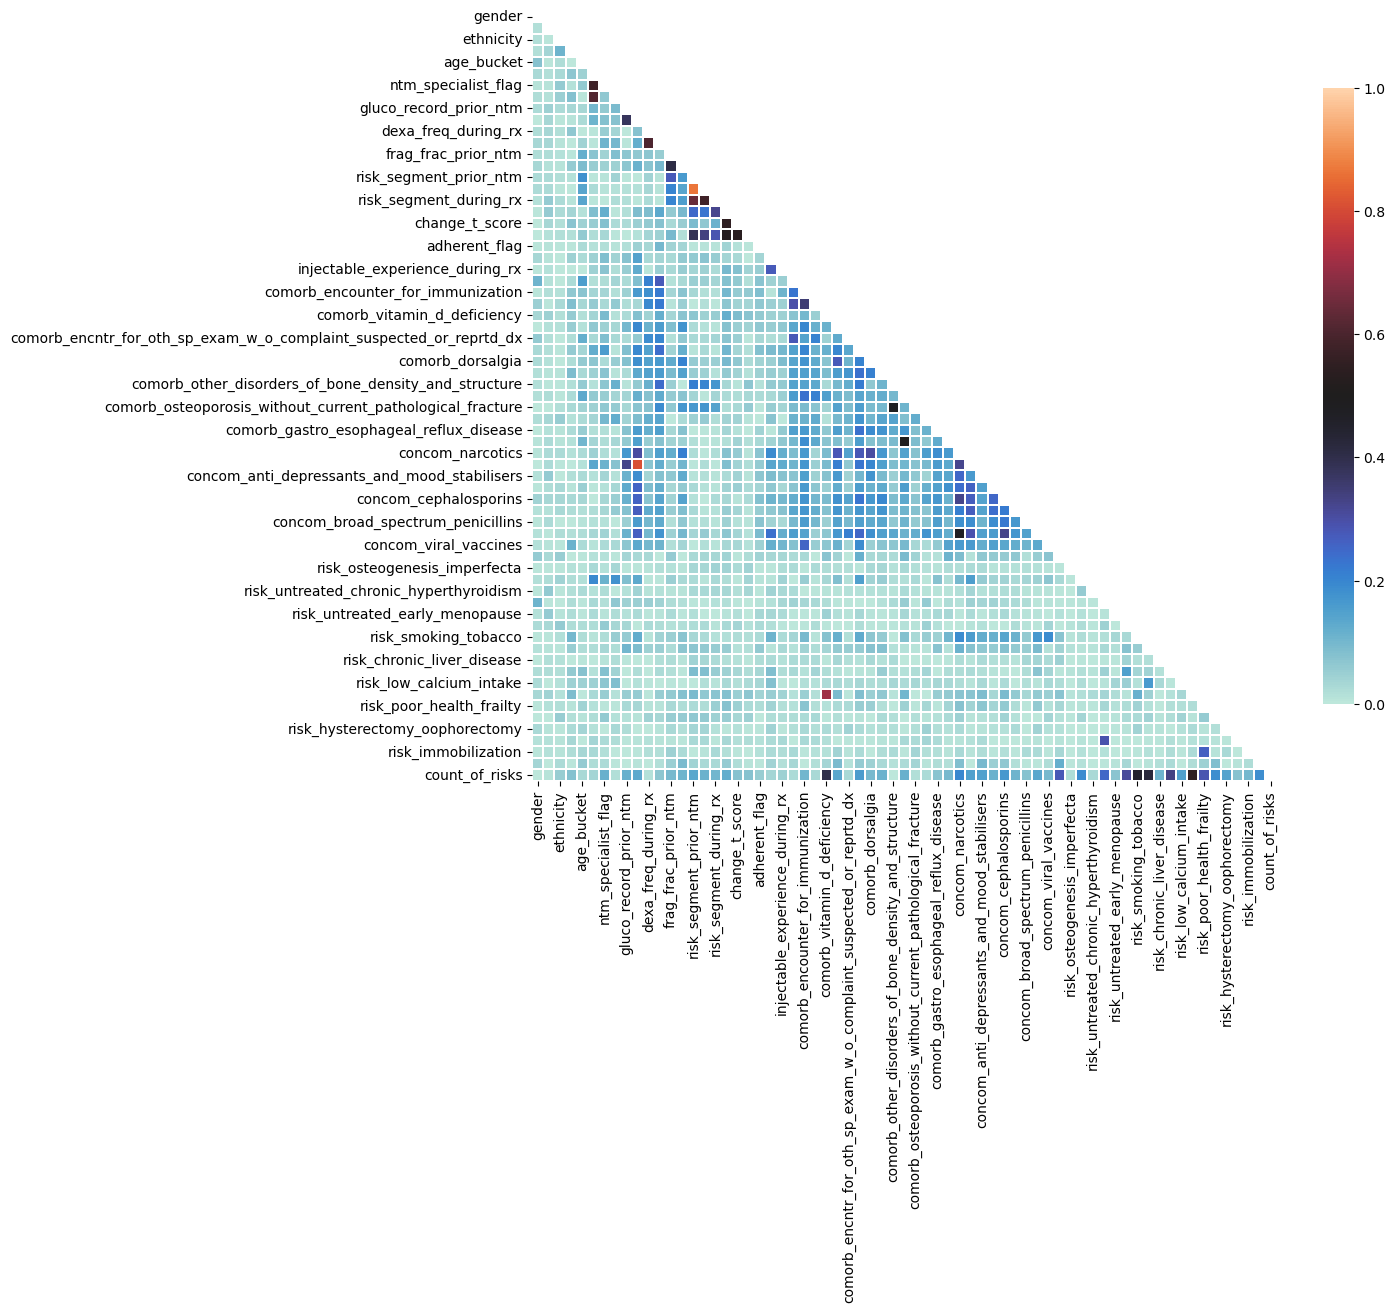

In [39]:
# Compute the correlation matrix
corr = np.abs(df.drop(['persistency_flag'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cbar_kws={"shrink": .8})

plt.show()

In [41]:
correlation_matrix = df.corr()
correlation_matrix

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
persistency_flag,1.000000,0.010343,0.003607,0.017690,0.085019,-0.001976,0.030025,0.139387,-0.112617,-0.005758,0.212704,0.335235,0.491823,0.000318,0.106935,0.012223,0.018903,-0.000700,-0.151677,-0.090298,-0.019067,0.112488,0.111440,0.098360,0.322320,0.314887,0.289828,0.172664,0.233279,0.213413,0.352760,0.215307,0.219665,0.247283,0.163495,0.139920,0.174835,0.220644,0.125552,0.191910,0.242854,0.110045,0.186190,0.221543,0.221611,0.197854,0.222293,0.222241,-0.019329,-0.002636,0.053809,-0.018785,0.067588,-0.005279,0.008311,0.098045,0.049158,0.018537,-0.003492,-0.009920,0.079782,-0.045277,-0.040138,-0.016106,-0.012155,-0.049787,-0.021345,0.082210
gender,0.010343,1.000000,0.015907,0.019339,0.017859,0.076696,0.030652,0.010406,-0.019670,0.024992,-0.003173,-0.022068,-0.031272,0.019665,0.032344,-0.023967,-0.024345,-0.013185,-0.006271,0.003775,0.000571,0.006910,-0.034503,0.007548,-0.108880,0.005787,0.050129,-0.032324,-0.001674,-0.062394,0.028778,0.026707,0.017895,-0.018859,-0.017702,0.000125,0.023298,-0.002266,0.008049,0.008262,-0.003163,-0.015011,-0.006790,0.042565,0.012362,0.004258,0.013773,0.012461,0.058407,-0.007257,-0.015637,-0.005925,0.105644,-0.014534,-0.026439,0.004887,0.012372,-0.000347,-0.021815,-0.027311,-0.032103,0.006158,0.001859,-0.031023,-0.013913,0.004093,0.036774,0.002931
race,0.003607,0.015907,1.000000,-0.004106,-0.037080,0.004620,-0.017959,-0.008400,-0.013060,0.046804,0.031703,0.032811,0.032648,0.022485,0.013346,0.023808,0.026473,0.054996,0.057125,-0.034499,0.015132,-0.008001,-0.008187,-0.014299,-0.013606,-0.016244,-0.006333,-0.044521,-0.014406,-0.016780,0.015978,0.012289,0.010563,0.005562,0.023162,-0.002971,0.033046,0.013456,0.026648,0.024838,0.024983,0.057457,0.022924,0.032550,0.012414,0.027060,0.006395,-0.010028,-0.028322,0.006595,-0.019550,-0.061897,0.005002,-0.055562,0.029315,-0.007207,0.010891,0.016190,0.022973,0.002666,-0.040813,0.011886,-0.003746,0.008620,0.012643,0.014270,0.003017,-0.009935
ethnicity,0.017690,0.019339,-0.004106,1.000000,-0.108

<b>Model Preparation</b>

In [89]:
# Define X and y variables
X = df.drop(columns='persistency_flag').values
y = df['persistency_flag'].values

# Preprocessing: Feature Scaling (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Display shapes of scaled training and testing sets
print('Train:', train_shape.shape)
print('Test: ', test_shape.shape)

Train: (2568, 67)
Test:  (856, 67)


<b>Decision Tree</b>

In [105]:
# Preprocessing: Feature Scaling (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters and their values for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV instance
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
dt_grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = dt_grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model to make predictions on the test set
best_model = dt_grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.7722627737226277
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       431
           1       0.72      0.63      0.67       254

    accuracy                           0.77       685
   macro avg       0.76      0.74      0.75       685
weighted avg       0.77      0.77      0.77       685



<b> Logistic Regression Model </b>

In [106]:
# Preprocessing: Feature Scaling (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Define the hyperparameters and their values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']  # Regularization penalty ('l1' or 'l2')
}

# Create a GridSearchCV instance
lr_grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
lr_grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = lr_grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model to make predictions on the test set
best_model = lr_grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# check other metrics like precision, recall, f1-score, etc.
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.8087591240875912
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       431
           1       0.78      0.68      0.72       254

    accuracy                           0.81       685
   macro avg       0.80      0.78      0.79       685
weighted avg       0.81      0.81      0.81       685



c:\Users\msavg\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\msavg\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\msavg\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\msavg\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    

<b>Random Forest</b>

In [104]:
# Preprocessing: Feature Scaling (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV instance
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
rf_grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = rf_grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Use the best model to make predictions on the test set
best_model = rf_grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# You can also check other metrics like precision, recall, f1-score, etc.
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8014598540145985
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       431
           1       0.76      0.67      0.72       254

    accuracy                           0.80       685
   macro avg       0.79      0.78      0.78       685
weighted avg       0.80      0.80      0.80       685



<b>ROC Curve</b>

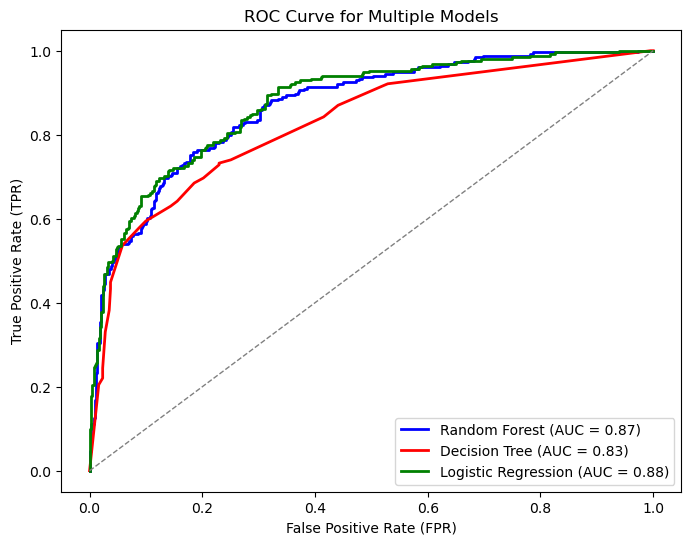

In [108]:
# Initialize models
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# dt_classifier = DecisionTreeClassifier(random_state=42)
# logreg_classifier = LogisticRegression(max_iter=1000)

# # Train models
# rf_classifier.fit(X_train, y_train)
# dt_classifier.fit(X_train, y_train)
# logreg_classifier.fit(X_train, y_train)

# Predict probabilities for each model
y_probs_rf = rf_grid_search.predict_proba(X_test)[:, 1]
y_probs_dt = dt_grid_search.predict_proba(X_test)[:, 1]
y_probs_logreg = lr_grid_search.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_probs_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Multiple Models')
plt.legend(loc='lower right')
plt.show()